In [87]:
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
wind_dat = pd.read_csv("/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/raw/capacity_factor/Wind/ninja_wind_country_GB_current-merra-2_corrected.csv")
print(wind_dat.head())

               time  national  offshore  onshore
0  01/01/1980 00:00    0.2024    0.2858   0.1496
1  01/01/1980 01:00    0.2016    0.2827   0.1502
2  01/01/1980 02:00    0.2015    0.2852   0.1485
3  01/01/1980 03:00    0.2032    0.2920   0.1470
4  01/01/1980 04:00    0.2090    0.3039   0.1489


In [89]:
wind_dat['timestamp'] = pd.to_datetime(wind_dat['time'])
wind_dat = wind_dat.drop('time', 1)
print(wind_dat.head())

   national  offshore  onshore           timestamp
0    0.2024    0.2858   0.1496 1980-01-01 00:00:00
1    0.2016    0.2827   0.1502 1980-01-01 01:00:00
2    0.2015    0.2852   0.1485 1980-01-01 02:00:00
3    0.2032    0.2920   0.1470 1980-01-01 03:00:00
4    0.2090    0.3039   0.1489 1980-01-01 04:00:00


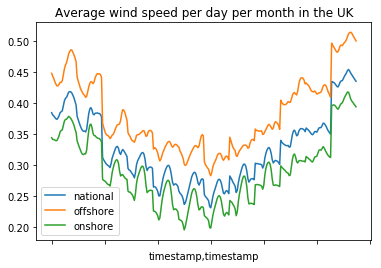

In [90]:
month = wind_dat[wind_dat.timestamp > "2011-05-27"].groupby([wind_dat['timestamp'].dt.month, wind_dat['timestamp'].dt.hour]).mean()
month.plot.line()
plt.title("Average wind speed per day per month in the UK")
plt.show()

In [108]:
energy_demand = pd.read_csv("/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/raw/electricity_demand/uk_all_year_demand.csv")
energy_demand = energy_demand.rename(columns={' timestamp':'timestamp', ' demand':'demand'})
energy_demand = energy_demand[energy_demand.timestamp < '2016-12-31'].iloc[3:]
energy_demand = energy_demand.drop('id', 1)
energy_demand['timestamp'] = pd.to_datetime(energy_demand['timestamp'])
print(energy_demand.tail())

                 timestamp  demand
796057 2018-12-27 18:35:33   41289
796058 2018-12-27 18:40:33   41116
796059 2018-12-27 18:45:34   41030
796060 2018-12-27 18:50:33   40862
796061 2018-12-27 18:55:33   40850


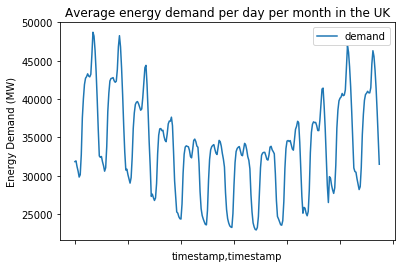

In [92]:
energy_month = energy_demand.groupby([energy_demand['timestamp'].dt.month, energy_demand['timestamp'].dt.hour]).mean()
energy_month.plot.line().set_ylabel("Energy Demand (MW)")
plt.title("Average energy demand per day per month in the UK")
plt.show()

In [93]:
energy_demand['timestamp'] = pd.to_datetime(energy_demand['timestamp'])
energy_demand = energy_demand.set_index('timestamp')
energy_demand_mean = energy_demand.resample('1H').mean()
print(energy_demand_mean.head())

                           demand
timestamp                        
2011-05-27 16:00:00  38649.090909
2011-05-27 17:00:00  37497.583333
2011-05-27 18:00:00  36146.333333
2011-05-27 19:00:00  34741.166667
2011-05-27 20:00:00  34722.666667


In [94]:
# wind_dat = wind_dat.set_index('timestamp')
print(wind_dat.head())

   national  offshore  onshore           timestamp
0    0.2024    0.2858   0.1496 1980-01-01 00:00:00
1    0.2016    0.2827   0.1502 1980-01-01 01:00:00
2    0.2015    0.2852   0.1485 1980-01-01 02:00:00
3    0.2032    0.2920   0.1470 1980-01-01 03:00:00
4    0.2090    0.3039   0.1489 1980-01-01 04:00:00


In [96]:
# energy_demand_mean.set_index('timestamp')
wind_dat = wind_dat.set_index('timestamp')
# print(energy_demand_mean.columns)
# print(wind_dat.columns)

series = energy_demand_mean[(energy_demand_mean.demand>20000) & (energy_demand_mean.demand<50000)].join(wind_dat, how='inner').dropna()

                     national  offshore  onshore
timestamp                                       
2016-12-31 19:00:00    0.3921    0.5840   0.2705
2016-12-31 20:00:00    0.3841    0.5899   0.2538
2016-12-31 21:00:00    0.3874    0.6013   0.2520
2016-12-31 22:00:00    0.3888    0.5903   0.2612
2016-12-31 23:00:00    0.3645    0.5147   0.2694
                           demand
timestamp                        
2018-12-27 14:00:00  36784.750000
2018-12-27 15:00:00  37835.750000
2018-12-27 16:00:00  40393.583333
2018-12-27 17:00:00  42150.583333
2018-12-27 18:00:00  41516.333333
                           demand  national  offshore  onshore
timestamp                                                     
2011-05-27 16:00:00  38649.090909    0.3796    0.3201   0.4173
2011-05-27 17:00:00  37497.583333    0.4097    0.3513   0.4467
2011-05-27 18:00:00  36146.333333    0.4213    0.3603   0.4599
2011-05-27 19:00:00  34741.166667    0.4468    0.3921   0.4814
2011-05-27 20:00:00  34722.666667    0.45

In [97]:
print(series.describe())

             demand      national      offshore       onshore
count  48029.000000  48029.000000  48029.000000  48029.000000
mean   34266.681781      0.325086      0.380893      0.289741
std     6747.742998      0.210083      0.242567      0.205713
min    20024.000000      0.008500      0.003100      0.005300
25%    28926.000000      0.157300      0.181600      0.126300
50%    34023.000000      0.274800      0.332000      0.234500
75%    39257.166667      0.454200      0.549400      0.402000
max    49999.750000      0.970900      0.986300      0.964900


In [98]:
print(series.sort_values(by=['demand']).tail())

                           demand  national  offshore  onshore
timestamp                                                     
2013-12-16 16:00:00  49994.666667    0.4513    0.4397   0.4586
2012-01-30 12:00:00  49996.666667    0.2016    0.1871   0.2107
2012-11-07 18:00:00  49997.166667    0.2075    0.3388   0.1243
2012-01-24 19:00:00  49997.333333    0.1969    0.2284   0.1770
2012-01-23 19:00:00  49999.750000    0.3224    0.4538   0.2391


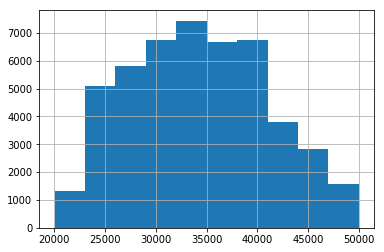

In [99]:
series.demand.hist()
plt.show()

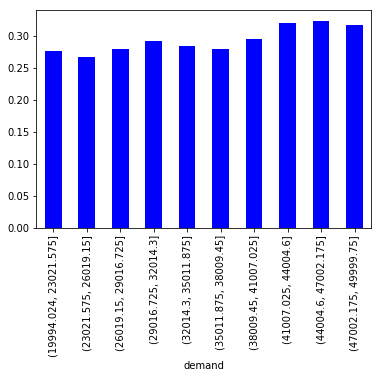

In [103]:
series.groupby(pd.cut(series.demand,10)).onshore.mean().plot(kind='bar', color='blue')
plt.show()


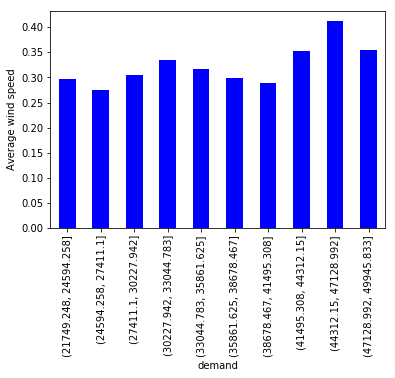

In [104]:
series_2011 = series[(series.index>'2011-01-01') & (series.index<'2012-01-01')]
series_2011.groupby(pd.cut(series_2011.demand,10)).onshore.mean().plot(kind='bar', color='blue').set_ylabel("Average wind speed")
plt.show()

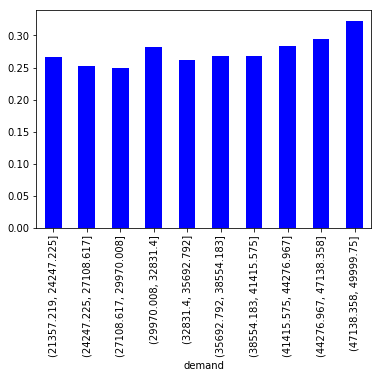

In [105]:
series_2012 = series[(series.index>'2012-01-01') & (series.index<'2013-01-01')]
series_2012.groupby(pd.cut(series_2012.demand,10)).onshore.mean().plot(kind='bar', color='blue')
plt.show()

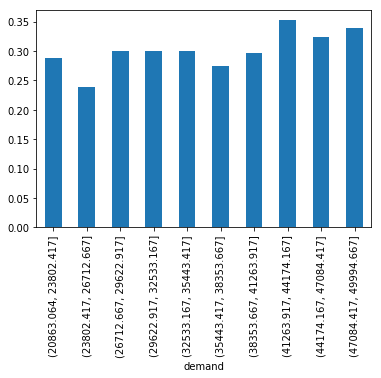

In [144]:
series_2013 = series[(series.index>'2013-01-01') & (series.index<'2014-01-01')]
series_2013.groupby(pd.cut(series_2013.demand,10)).onshore.mean().plot(kind='bar')
plt.show()

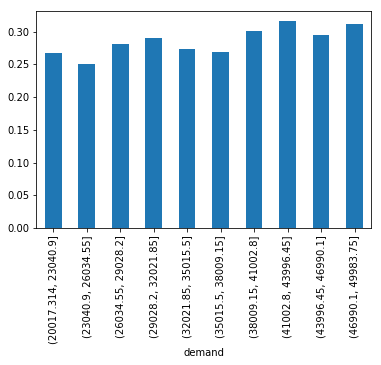

In [145]:
series_2014 = series[(series.index>'2014-01-01') & (series.index<'2015-01-01')]
series_2014.groupby(pd.cut(series_2014.demand,10)).onshore.mean().plot(kind='bar')
plt.show()

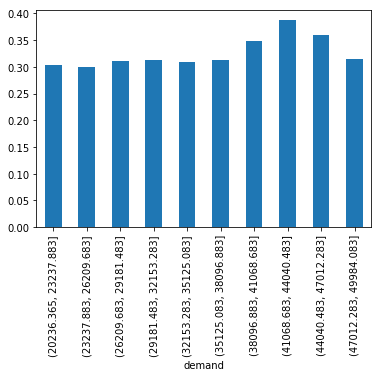

In [146]:
series_2015 = series[(series.index>'2015-01-01') & (series.index<'2016-01-01')]
series_2015.groupby(pd.cut(series_2015.demand,10)).onshore.mean().plot(kind='bar')
plt.show()

Write processed files to data storage.

In [111]:
energy_demand_mean.to_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/processed/electricity_demand/uk_all_year_demand.csv')
wind_dat.to_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/processed/capacity_factor/Wind/ninja_wind_country_GB_current-merra-2_corrected.csv')